### 선형 회귀분석과 Elastic Net 실습

In [1]:
# 필요한 패키지 설치

import pandas as pd # csv file 
import numpy as np
from sklearn.linear_model import LinearRegression # 선형회귀모델 생성 
from sklearn.model_selection import train_test_split # train/test set 생성 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error # MSE : 평균제곱오차 - model 평가 
from sklearn import datasets # sklearn 기본 데이터셋 load
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv("kc_house_data.csv")

# 데이터 샘플 확인
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# 각 컬럼의 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# 각 컬럼의 통계치 확인
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### 모든 모델에서 통계치 확인은 필수적이다. 특히, 최소,최댓값을 통해 이상치가 없는지 확인해야한다.
##### bedrooms의 최댓값이 33인데, 혹여나 잘못된 값은 아닌지 확인해보는 것이 좋아보인다.

C:\Users\qorud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


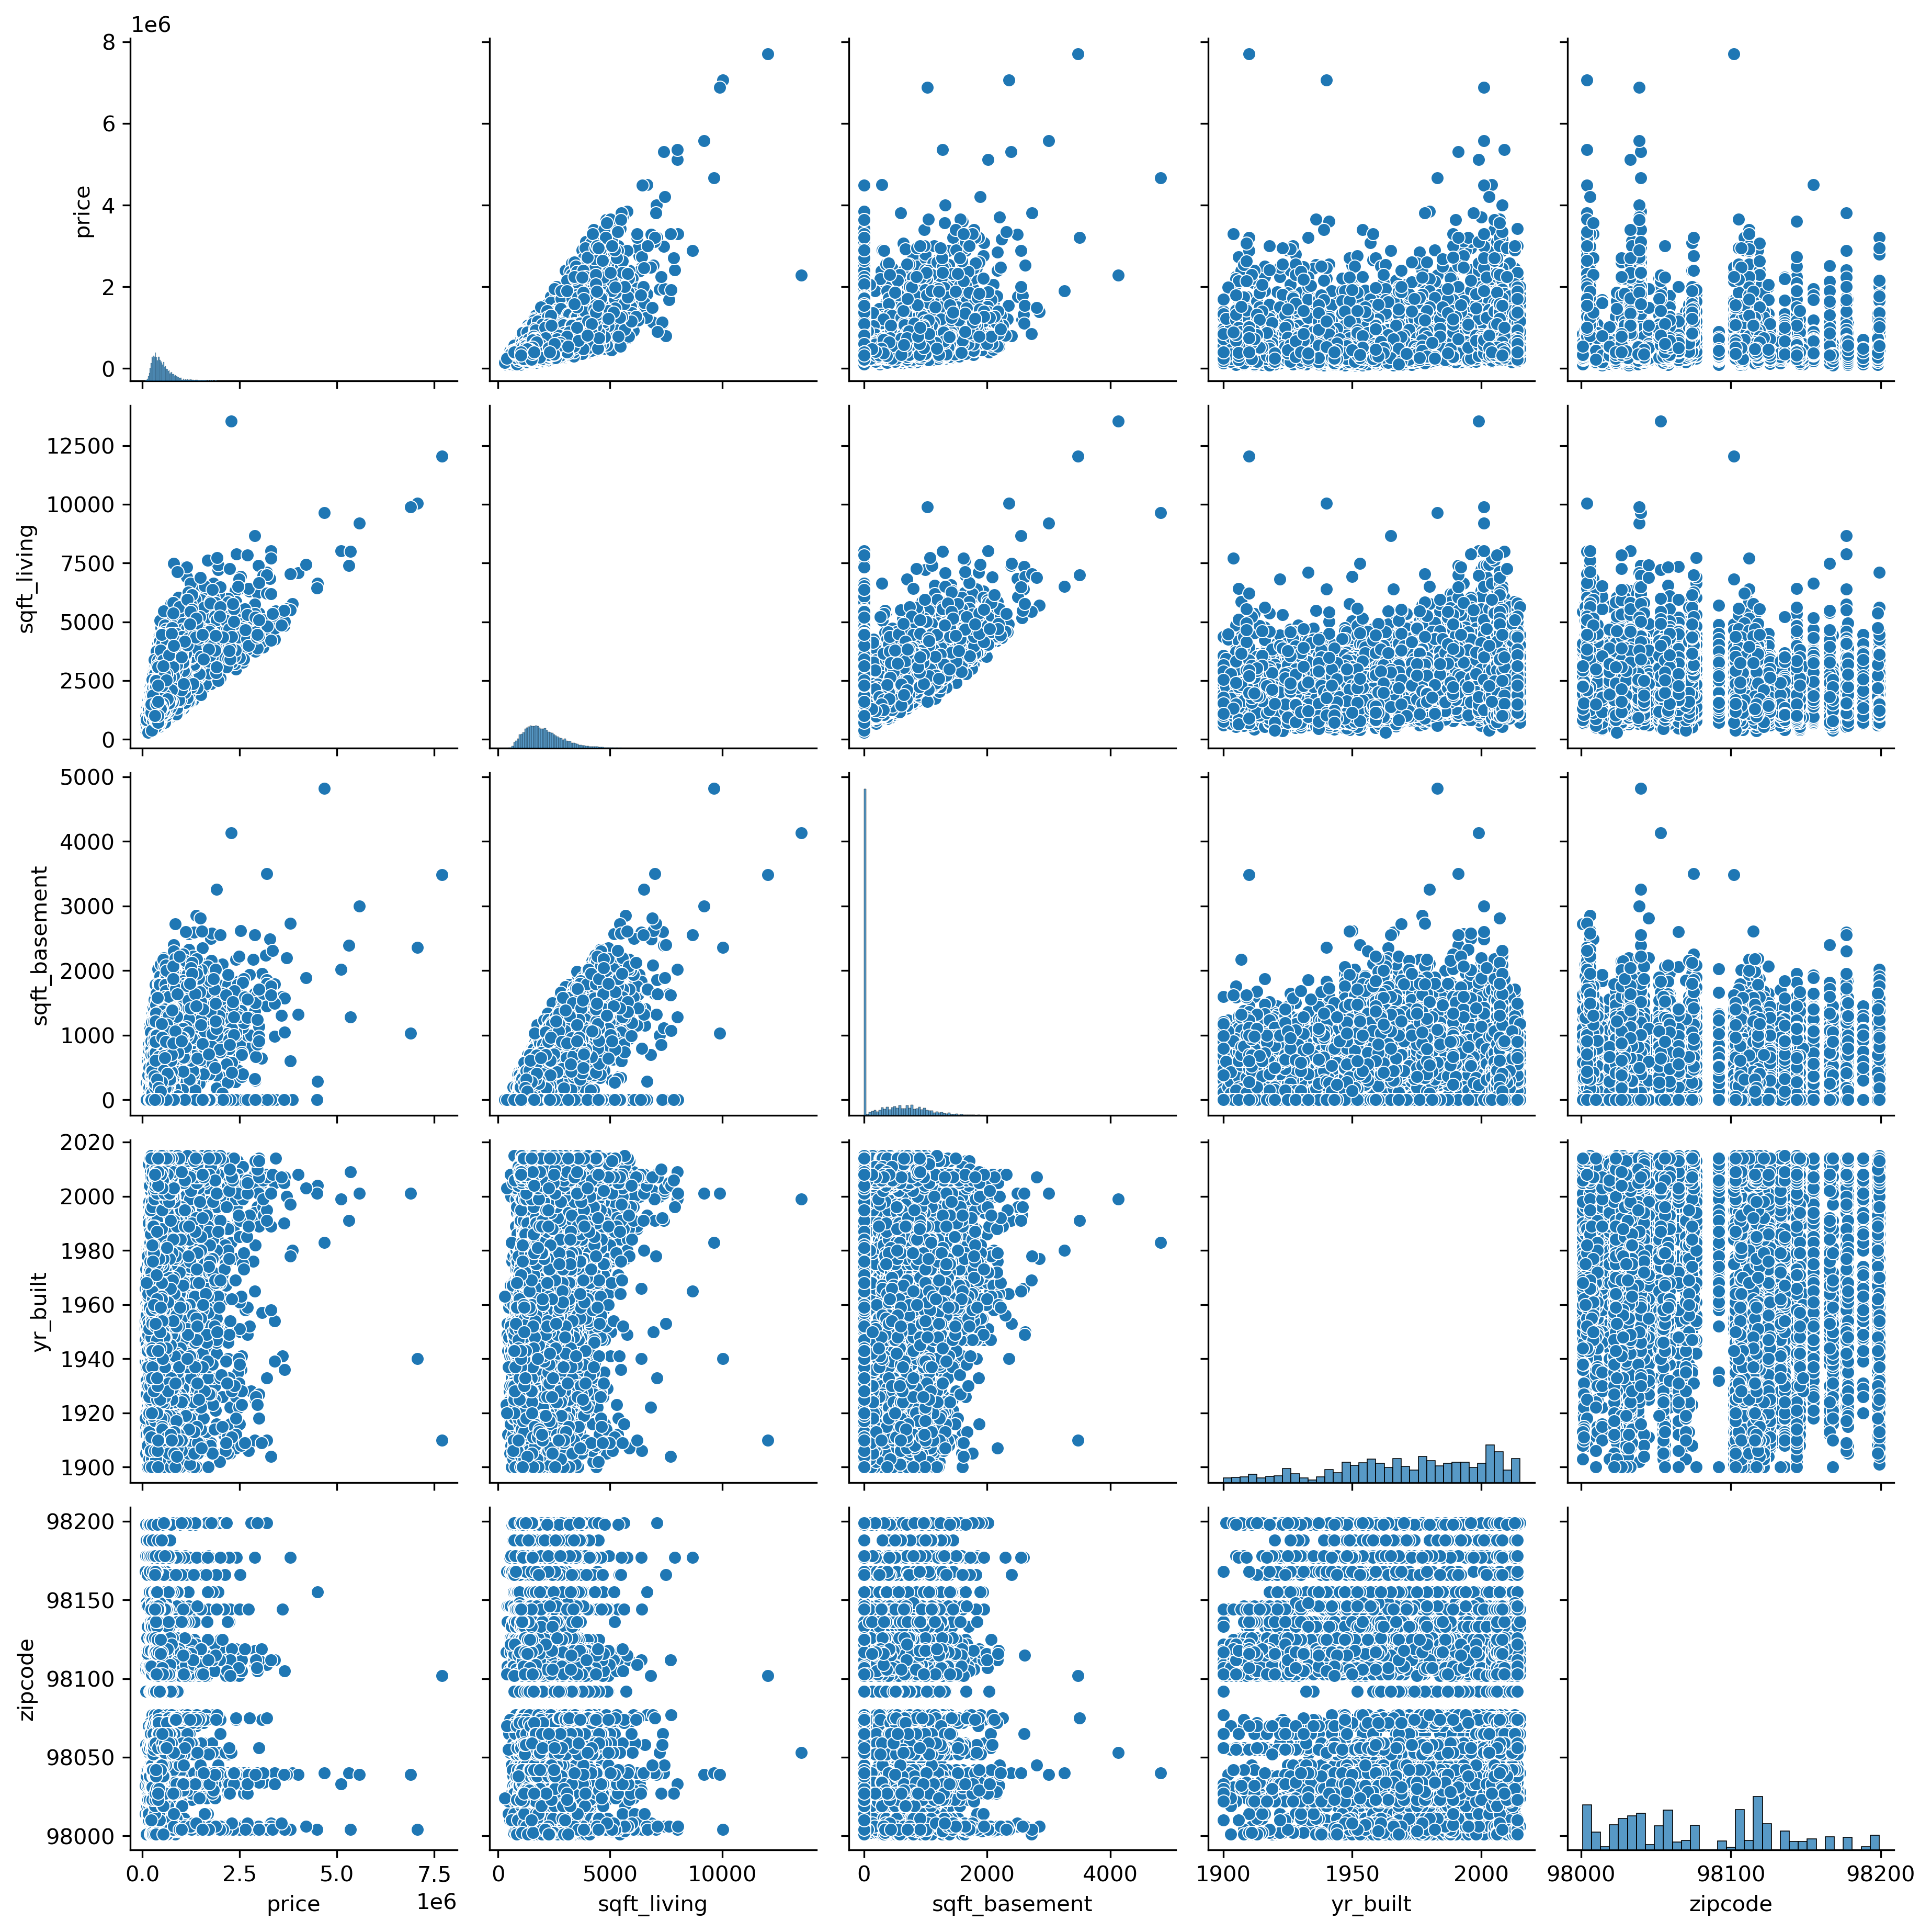

In [5]:
# 데이터 시각화 하여 분포 확인하기

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

sns.pairplot(df[["price", "sqft_living", "sqft_basement", "yr_built", "zipcode"]])
plt.show()



##### 데이터 시각화를 하여 직관적으로 데이터를 파악한다.
##### 샘플로 종속변수인 price를 포함한 5개의 변수의 산포도를 확인해 보자.
##### price는 sqft_living과 sqft_basement 변수에 강한 영향을 받을 것으로 추측할 수 있다.
##### yr_built와도 약간의 상관관계가 있는 것으로 보인다.
##### 아무래도 지어진 시기가 최근일수록 집 가격이 높은 경향이 있을 것이니 논리적으로 맞아 보인다.
##### 이처럼 각 변수와의 관계를 상식적,비즈니스적으로 해석해 보는 것이 좋다.
##### 또한, sqft_living과 sqft_basement 두 변수 간에도 높은 상관관계가 보인다. 이처럼 독립변수 간의 상관성이 높으면 다중공산성을 유발하여
##### 모델 성능을 저하시킬 수 있으므로 주의해야 한다.

In [6]:
# 변수 선택 및 컬럼명 붙여넣기 위한 컬럼 리스트 생성
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# 독립변수와 종속변수 분리하여 생성
x = df[[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
# 'id', 'date'는 키값에 해당하므로 변수에서 제외 해준다.
y = df[['price']]

# 학습셋과 테스트셋 분리하여 생성(7:3)
# df_train, df_test = train_test_split(df, test_size = 0.3) 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)



##### 독립변수 데이터셋에는 키값인 id와 date 그리고 종속변수인 price를 제외한 모든 변수를 넣어주었다.
##### 그리고 학습셋과 테스트셋은 train_test_split() 함수로 7:3 비율로 분리해준다.

In [8]:
# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

#대략 7:3으로 잘 나누어진 것을 확인할 수 있다.

train data 개수:  15129
test data 개수:  6484


In [9]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train) 

LinearRegression()

##### 여기서 fit_intercept는 상수항을 넣을지 말지를 성절해주는 옵션이다. 기본값은 true라서 상수항을 빼지 않을거라면 생략해도 된다.

In [10]:
# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

##### 학습셋으로 생성된 모델을 테스트셋에 적용하여 예측값을 생성한다.
##### 이를 통해 모델 성능을 측정할 수 있다.
##### 우선 생성된 모델의 상숫값과 회귀게쑤를 확인하라면 다음의 코드로 생성한다.

In [11]:
# 모델의 상수값 확인
print(mreg.intercept_)

# 모델의 회귀계수 확인
print(mreg.coef_)

[3691612.85968553]
[[-4.10245462e+04  4.64692723e+04  1.12574731e+02  1.12138168e-01
   1.92245617e+03  5.61075835e+05  5.56204982e+04  2.44645773e+04
   9.67813620e+04  7.02060640e+01  4.23686667e+01 -2.59815523e+03
   1.71143501e+01 -5.33393321e+02  5.90935363e+05 -2.04246643e+05
   2.09104148e+01 -3.53841068e-01]]


In [12]:
print("학습셋 R-Square: {:.2f}".format(mreg.score(x_train, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg.score(x_test, y_test)))

학습셋 R-Square: 0.70
테스트셋 R-Square: 0.71


##### 학습셋의 R-square가 0.7이면 준수한 수준이다. 하지만 실무에선 0.7이상인 것을 찾기 힘들다.
##### 그리고 테스트셋의 결정계수값과 그렇게 큰 차이가 없기 때문에 과적합되지 않았음을 판단할 수 있다.
##### 이 수치는 모델을 돌릴 때마다 달라질 수 있다. 왜냐하면 학습셋과 테스트셋 분리단계에서 데이터가 무작위로 배정되기 때문이다.
##### 결과를 고정하려면 RandomState() 함수를 사용하면 된다.

In [13]:
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2039.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:14:41   Log-Likelihood:            -2.0649e+05
No. Observations:               15129   AIC:                         4.130e+05
Df Residuals:                   15111   BIC:                         4.131e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.692e+06   3.56e+06      1.037      0.300   -3.29e+06    1.07e+07
bedrooms      -4.102e+04   2406.915    -17.044      0.000   -4.57e+04   -3.63e+04
bathrooms      4.647e+04   3954.670     11.750      0.000    3.87e+04    5.42e+04
sqft_living     112.5742      2.765     40.719      0.000     107.155     117.993
sqft_lot          0.1121      0.056      2.013      0.044       0.003       0.221
floors         1922.4562   4373.687      0.440      0.660   -6650.499    1.05e+04
waterfront     5.611e+05   2.09e+04     26.864      0.000     5.2e+05    6.02e+05
view           5.562e+04   2631.422     21.137      0.000    5.05e+04    6.08e+04
condition      2.446e+04   2861.974      8.548      0.000    1.89e+04    3.01e+04
grade          9.678e+04   2624.539     36.876      0.000    9.16e+04    1.02e+05
sqft_above       70.2066      2.746     25.567      0.000      64.824      75.589
sqft_basement    42.3692      3.209     13.202      0.000      36.078      48.660
yr_built      -2598.1552     88.338    -29.411      0.000   -2771.309   -2425.002
yr_renovated     17.1144      4.491      3.810      0.000       8.310      25.918
zipcode        -533.3933     40.062    -13.314      0.000    -611.919    -454.868
lat            5.909e+05    1.3e+04     45.351      0.000    5.65e+05    6.16e+05
long          -2.042e+05   1.58e+04    -12.890      0.000   -2.35e+05   -1.73e+05
sqft_living15    20.9104      4.196      4.984      0.000      12.686      29.135
sqft_lot15       -0.3538      0.088     -4.031      0.000      -0.526      -0.182
==============================================================================
Omnibus:                    13394.976   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1543101.858
Skew:                           3.768   Prob(JB):                         0.00
Kurtosis:                      51.899   Cond. No.                     4.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.34e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### p-value를 확인할 떄 LinearRegresision 패키지는 모델 결과치를 확인하기 어렵다. 수식을 입려하면 되지만 여간 번거러운게 아니다
##### 이에 OLS 패키지를 사용한다.
##### 마지막 NOTES의 2번을 보면 다중공산성 문제가 있을 가능성이 높다고 알려준다.
##### 모델 성능을 떨어트리는 변수들을 제거하거나 가공해주는 절차가 필요해보인다.
##### 이처럼 모델 성능 평가를 통해 데이터와 모델을 수정해 가며 성능을 향상시키는 작업이 필요하다.
##### 그리고 모델 성능을 측정하는 방법은 이 외에도 다양하다,
##### RMSE,MAE,AIC,BIC등 다른 기준은 모델 평가 부분에서 자세히 다루도록 하겠다.
##### 이어서 비선형 예측 모델인 다항회귀를 실습한다.

In [14]:
# 다항회귀 불러오기
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 변환
poly_m = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_m.fit_transform(x_train)

# 다항 회귀모델 생성
mreg_poly = LinearRegression(fit_intercept=True)

# 다항회귀 학습
mreg_poly.fit(x_train_poly, y_train) 

# 테스트셋에 모델 적용
x_test_poly = poly_m.fit_transform(x_test)
y_predict_poly = mreg_poly.predict(x_test_poly)

##### 여기서 degree=2는 독립변수를 2차항으로 변환하겠다는 뜻이다. 값을 조정하여 차수를 높일 수 있다,
##### incluse_bias는 기본값이 True이다. 이는 편향을 위한 변수(X0)인 1을 추가하는 것인데, 다항식의 모든 거듭제곱이 0일경우에 True로 설정해준다.

In [15]:
# 모델의 상수값 확인
print(mreg_poly.intercept_)

# 모델의 회귀계수 확인
print(mreg_poly.coef_)

[1.52103513e+10]
[[ 1.25473413e+07 -4.65486806e+06  5.64856922e+03 -2.59042577e+02
  -4.59011998e+07  7.80607546e+07  3.09960821e+06 -1.69325431e+06
  -1.16397819e+07  3.32490128e+04 -2.69897389e+04 -2.90725545e+04
   3.95172611e+04 -3.58762892e+05  9.56156453e+07 -3.19255346e+06
  -2.13238946e+04  4.15199709e+02  6.57157611e+02 -2.10410834e+03
  -3.09088709e+01  4.67911775e-02  2.94219615e+04 -7.22549956e+04
   3.65590122e+03 -5.32916939e+03 -1.77077335e+03  1.67661888e+00
   2.46609464e+01 -1.98112701e+01 -1.64399062e+01 -4.23264948e+01
  -2.42087747e+04  5.87696083e+04  6.92976819e+00  2.57318502e-01
   3.55354600e+03  1.35388249e+01 -4.09067578e-01 -4.28268051e+04
   4.40399312e+04  8.28245534e+03 -1.32518716e+04  1.40899972e+04
   5.30198534e+00  8.13866524e+00  1.06041059e+02 -2.13411595e+01
  -9.18047802e+01  5.61010976e+04 -8.80255446e+04 -1.43000356e+00
   2.06701635e-01  1.55387965e+02 -2.89631925e+02  4.24095991e-02
   1.34028618e+02 -6.15789809e+00  1.20199447e+01  2.401549

In [16]:
print("학습셋 R-Square: {:.2f}".format(mreg_poly.score(x_train_poly, y_train)))
print("테스트셋 R-Square: {:.2f}".format(mreg_poly.score(x_test_poly, y_test)))


학습셋 R-Square: 0.83
테스트셋 R-Square: 0.82


##### 결정계수 값이 일반회귀모델보다 다항회귀 모델이 예측력이 좋은 것을 확인할 수 있다.
##### 테스트셋의 값도 큰 차이가 없어 과적합도 피한것으로 보인다.
##### 이를 통해 해당 데이터는 독립변수와 종속변수가 어느 정도 비선형적 관계를 가지고 있다고 판단할 수 있다.

In [17]:
# Ridge 설치
from sklearn.linear_model import Ridge

# alpha 별 모델 생성
ridge = Ridge().fit(x_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(x_train, y_train)
ridge100 = Ridge(alpha=100).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("ridge_train R2: {:.3f}".format(ridge.score(x_train, y_train)))
print("ridge_test R2: {:.3f}".format(ridge.score(x_test, y_test)))

print("ridge001_train R2: {:.3f}".format(ridge001.score(x_train, y_train)))
print("ridge001_test R2: {:.3f}".format(ridge001.score(x_test, y_test)))

print("ridge100_train R2: {:.3f}".format(ridge100.score(x_train, y_train)))
print("ridge100_test R2: {:.3f}".format(ridge100.score(x_test, y_test)))


ridge_train R2: 0.696
ridge_test R2: 0.707
ridge001_train R2: 0.696
ridge001_test R2: 0.707
ridge100_train R2: 0.689
ridge100_test R2: 0.695


##### Ridge 회귀 모델의 기본 alpha 값은 1이다. 추가로 알파값을0.01,100으로 조정하여 결정계수를 비교했다.
##### 기본 모델과 0.01모델은 성능의 차이가 거의 없으며, 100 모델은 과소적합으로 인해 성능이 떨어지는 것을 확인할 수 있다.
##### Lasso 또한 동일한 방법으로 실행했고, 주의할 점은 알파값에 따라 사용되는 변수가 달라지기 때문에 총 몇 개의 변수가 채택됐는지 확인할 필요가 있다.

In [18]:
# Lasso 설치
from sklearn.linear_model import Lasso

# alpha 별 모델 생성
lasso = Lasso().fit(x_train, y_train)
lasso001 = Lasso(alpha=0.01).fit(x_train, y_train)
lasso10000 = Lasso(alpha=10000).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("lasso_train R2: {:.3f}".format(lasso.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(lasso.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso.coef_ !=0))

print("lasso001_train R2: {:.3f}".format(lasso001.score(x_train, y_train)))
print("lasso001_test R2: {:.3f}".format(lasso001.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso001.coef_ !=0))

print("lasso10000_train R2: {:.3f}".format(lasso10000.score(x_train, y_train)))
print("lasso10000_test R2: {:.3f}".format(lasso10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(lasso10000.coef_ !=0))


C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.882e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.882e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(


lasso_train R2: 0.696
lasso_test R2: 0.707
num_of_IV: 18
lasso001_train R2: 0.696
lasso001_test R2: 0.707
num_of_IV: 18
lasso10000_train R2: 0.630
lasso10000_test R2: 0.631
num_of_IV: 13


C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.830e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(


##### 기본값인 첫번째 모델과 알파값을 0.01로 설정한 모델의 결정계수가 동일하게 나왔다.
##### 사용된 데이터셋의 총 변수 개수와 관측치 수가 많지 않기 때문에 알파값에 민감하게 반응하지 않는다.
##### 알파값을 10,000으로 설정했을 때는 6개의 변수가 ㅏㄹ락되어 총 12개의 변수가 사용된 모델이 생성됐고 과소적합이 발생해 예측력이 다소 감소했다.

In [19]:
# ElasticNet 설치
from sklearn.linear_model import ElasticNet

# alpha 별 모델 생성
elast = ElasticNet().fit(x_train, y_train)
elast001 = ElasticNet(alpha=100, l1_ratio = 0.1).fit(x_train, y_train)
elast10000 = ElasticNet(alpha=10000, l1_ratio = 1).fit(x_train, y_train)

# 모델 별 R-Square 산출
print("elast_train R2: {:.3f}".format(elast.score(x_train, y_train)))
print("lasso_test R2: {:.3f}".format(elast.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast.coef_ !=0))

print("elast001_train R2: {:.3f}".format(elast001.score(x_train, y_train)))
print("elast001_test R2: {:.3f}".format(elast001.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast001.coef_ !=0))

print("elast10000_train R2: {:.3f}".format(elast10000.score(x_train, y_train)))
print("elast10000_test R2: {:.3f}".format(elast10000.score(x_test, y_test)))
print("num_of_IV:", np.sum(elast10000.coef_ !=0))

C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.230e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.793e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(


elast_train R2: 0.620
lasso_test R2: 0.623
num_of_IV: 18
elast001_train R2: 0.544
elast001_test R2: 0.548
num_of_IV: 18
elast10000_train R2: 0.630
elast10000_test R2: 0.631
num_of_IV: 13


C:\Users\qorud\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.830e+14, tolerance: 2.088e+11
  model = cd_fast.enet_coordinate_descent(
